## 决策树

建模一般流程：   
1.实例化模型对象  
2.通过模型接口训练模型  
3.通过模型接口提取需要的信息   

## 分类树

导入数据包

In [19]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
# 导入红酒数据集
wine=load_wine()

In [4]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [7]:
# 划分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
print(Xtrain.shape)
print(Xtest.shape)

(124, 13)
(54, 13)


In [8]:
# 建立模型 entropy 
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(Xtrain,Ytrain)
score=clf.score(Xtest,Ytest)
print(score)


0.8703703703703703


In [32]:
pd.concat(wine.data,wine.target,axis=0)

TypeError: concat() got multiple values for argument 'axis'

In [34]:
# wine.data

d1=pd.DataFrame(wine.data)
d2=pd.DataFrame(wine.target)

In [40]:
d1.columns=feature_name
d2.columns=['酒类']
d3=pd.concat([d1,d2],axis=1)
# len(feature_name)

In [42]:
jiulist=["琴酒","雪莉","贝尔摩德"]
def jiulei(x):
    return jiulist[x]

In [43]:
d3['酒类']=d3['酒类'].apply(jiulei)

In [46]:
d3

,酒精,苹果酸,灰,灰的碱性,镁,总酚,类黄酮,非黄烷类酚类,花青素,颜色强度,色调,od280/od315稀释葡萄酒,脯氨酸,酒类
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,琴酒
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,琴酒
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,琴酒
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,琴酒
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,琴酒
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,贝尔摩德
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,贝尔摩德
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,贝尔摩德
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,贝尔摩德


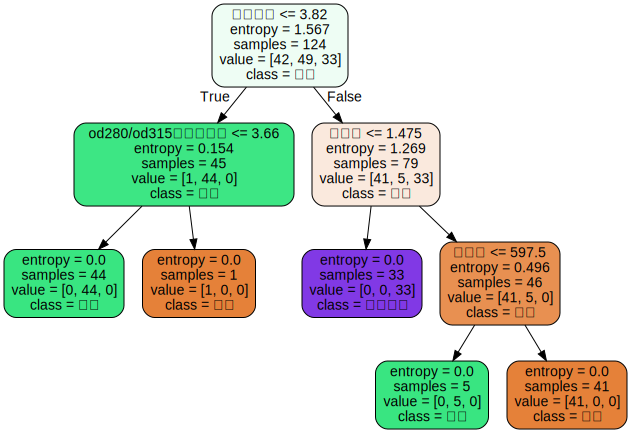

In [9]:
# 画图 决策树
import graphviz
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
# import graphviz
dot_data=tree.export_graphviz(clf,feature_names=feature_name
                    ,class_names=["琴酒","雪莉","贝尔摩德"]
                    ,filled=True
                    ,rounded=True)
graph=graphviz.Source(dot_data)
graph

In [18]:
#特征重要性
# feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
clf.feature_importances_
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.033450086518399806),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.03548785169541032),
 ('总酚', 0.0),
 ('类黄酮', 0.2153158158158539),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.010307835719316505),
 ('颜色强度', 0.2547091326684052),
 ('色调', 0.02502099804802857),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.4257082795345856)]

**random_state是用来设置分枝中随机模式的参数，默认为None**


In [20]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30)
clf = clf.fit(Xtrain, Ytrain)
#返回预测的准确度
score = clf.score(Xtest, Ytest) 
score

0.9444444444444444

模型评分为：0.9629629629629629


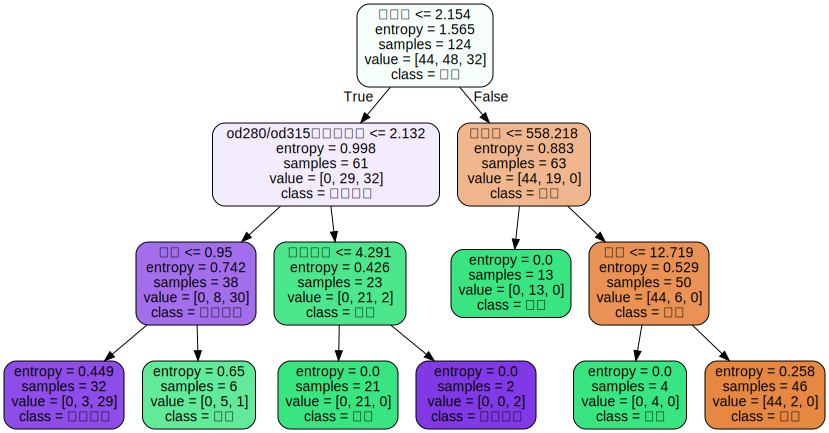

In [25]:
# 设置 max_depth=3 衍生的决策树最大深度为3层
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=30,splitter='random')
clf=clf.fit(Xtrain,Ytrain)
score=clf.score(Xtest,Ytest)
print('模型评分为：'+str(score))
dot_data=tree.export_graphviz(clf,feature_names=feature_name
                    ,class_names=["琴酒","雪莉","贝尔摩德"]
                    ,filled=True
                    ,rounded=True)
graph=graphviz.Source(dot_data)
graph


 **最优剪枝曲线**  
探索最大深度max_depth对模型的影响 


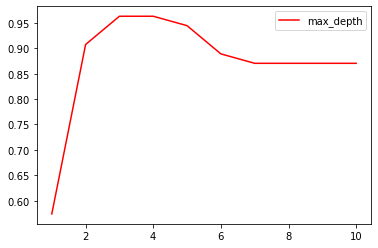

In [31]:

import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()
#从图像可以看出，最大深度为3的时候score到达最高点

## 回归树

In [32]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#加载波士顿房价数据集
boston = load_boston()
#初始化回归模型
regressor = DecisionTreeRegressor(random_state=0)
# 对模型进行交叉验证，并输出评分
cross_val_score(regressor, boston.data, boston.target, cv=10, scoring = "neg_mean_squared_error") 
#交叉验证cross_val_score的用法

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

## 泰坦尼克号幸存者预测

**导入数据包**

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#网格搜索
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

**导入数据集**  
数据查看

In [34]:
dat=pd.read_csv('./day08_data.csv')

In [35]:
dat.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
dat.drop(["Cabin","Name","Ticket"],inplace=True,axis=1) 
# 对年龄使用均值进行填充
dat["Age"] = dat["Age"].fillna(dat["Age"].mean())
dat = dat.dropna()

In [39]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [44]:
dat.groupby('Sex').count()['Age']

Sex
0    312
1    577
Name: Age, dtype: int64

In [43]:
dat["Sex"] = (dat["Sex"]== "male").astype("int") 

In [47]:
#将三分类变量转换为数值型变量
labels = dat["Embarked"].unique().tolist()
# labels
dat["Embarked"] = dat["Embarked"].apply(lambda x: labels.index(x))

In [49]:
dat.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [50]:
X=dat.iloc[:,dat.columns!='Survived']
y=dat.iloc[:,dat.columns=='Survived']
Xtrain,Xtest,ytrain,ytest  =train_test_split(X,y,test_size=0.3)

In [53]:
# 修改测试集和训练集的索引
for i in [Xtrain,Xtest,ytrain,ytest]:
    i.index=range(i.shape[0])

In [52]:
print(Xtrain.shape)
print(ytrain.shape)

(622, 8)
(622, 1)


In [61]:
# 初始化模型
clf=tree.DecisionTreeClassifier()
# 训练数据
clf=clf.fit(Xtrain,ytrain)
# 查看评分
print(clf.score(Xtest,ytest))

0.7715355805243446


In [63]:
#每次结果都不稳定，决策树分枝具有随机性
#使用交叉验证查看
cross_val_score(clf,Xtest,ytest,cv=10).mean()

0.7904558404558404

0.8166624106230849


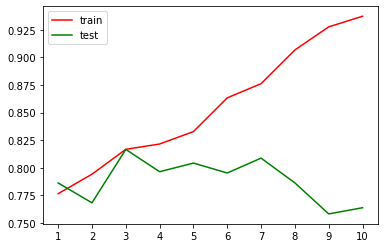

In [85]:
tr=[]
te=[]
for i in range(10):
    clf=DecisionTreeClassifier(random_state=30,max_depth=i+1,criterion='entropy')
    clf=clf.fit(Xtrain,ytrain)
    score_tr=clf.score(Xtrain,ytrain)
    score_te=cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))

plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='green',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

## 网格搜索

In [ ]:
# 使用网格搜索
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')
            ,'criterion':("gini","entropy")
            ,"max_depth":[*range(1,10)]
            ,'min_samples_leaf':[*range(1,50,5)]
            ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
            }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,ytrain)
GS.best_params_
GS.best_score_

0.8087045570916539

In [88]:
# 网格搜索最优参数
GS.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 11,
 'splitter': 'random'}

In [89]:
clf = DecisionTreeClassifier(random_state=25,criterion='gini',max_depth=4,min_impurity_decrease=0,min_samples_leaf=11,splitter='random')
clf=clf.fit(Xtrain,ytrain)
clf.score(X,y)

0.8143982002249719

In [99]:
cross_val_score(clf,X,y,cv=10).mean()

0.8188712972420837